# Development for morphology trait extraction

This notebook gives example and a platform to develop and visualize extraction on morphological traits
The function framework is based on a class "Traits_class" define in the same folder.
if you modify the "Traits_class" reload the module by running the first cell to see the modification appear in the notebook.

**Study case:**




In [83]:
# load what you need
import Traits_class as tc
import json, sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import importlib
import skimage as ski
importlib.reload(tc)

<module 'Traits_class' from '/users/PAS2136/thibaulttabarin/Morphology-analysis/Scripts/Traits_class.py'>

In [84]:
# load the test image, you can add more test image if you have bug related to specific images.
segmented_file = '../Test_Data/INHS_FISH_000742_segmented.png'
metadata_file = '../Test_Data/INHS_FISH_000742.json'

In [85]:
# Create the object segmented image create by the class during initialisation
img_seg = tc.segmented_image(segmented_file)

# variable create at initialization time
measurement = img_seg.measurement
landmark = img_seg.landmark
presence_matrix = img_seg.presence_matrix
img_landmark = img_seg.visualize_landmark()

## 2 - Explore the output

    1- Presence Matrix
    2- Landmark
    3- Visualize landmark
    4- measurement

In [86]:
# presence dictionnary
presence_matrix

{'dorsal_fin': {'number': 1, 'percentage': 1.0},
 'adipos_fin': {'number': 0, 'percentage': 0},
 'caudal_fin': {'number': 1, 'percentage': 1.0},
 'anal_fin': {'number': 1, 'percentage': 1.0},
 'pelvic_fin': {'number': 1, 'percentage': 1.0},
 'pectoral_fin': {'number': 1, 'percentage': 1.0},
 'head': {'number': 1, 'percentage': 1.0},
 'eye': {'number': 1, 'percentage': 1.0},
 'caudal_fin_ray': {'number': 0, 'percentage': 0},
 'alt_fin_ray': {'number': 0, 'percentage': 0},
 'trunk': {'number': 2, 'percentage': 0.992120507069956}}

In [87]:
# measurement dictionnary
measurement

{'SL': 586.0034129593445,
 'EA': 922,
 'HAt': 8437.999999999995,
 'HAp': 16034,
 'HCL': 'WIP',
 'ED': 34.262616074167774,
 'HL': 151.64761785138597,
 'HD': 158.3161394173064,
 'pOD': 32.31098884280702}

In [88]:
# landmark dictionnary
landmark

{'1': (148, 36),
 '2': (66, 148),
 '3': (21, 301),
 '4': (106, 566),
 '5': (112, 606),
 '6': (150, 622),
 '7': (203, 592),
 '8': (200, 562),
 '9': (242, 478),
 '10': (279, 305),
 '11': (217, 169),
 '12': (162, 187),
 '13': (224, 138),
 '14': (136, 66),
 '15': (134, 96)}

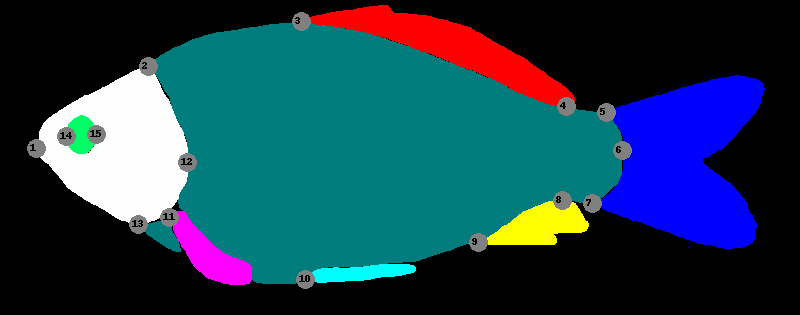

In [89]:
# Visualize landmarks 
img_landmark

In [57]:
masks = img_seg.mask
t = img_seg.clean_trait_region(masks['eye'])
print(t.equivalent_diameter_area)
img_seg.measure_eye_diameter()

34.262616074167774


17.131308037083887

In [24]:
trunk_pro = img_seg.clean_trait_region(masks['trunk'])
trunk_pro.perimeter
trunk_pro.area

82724

82724

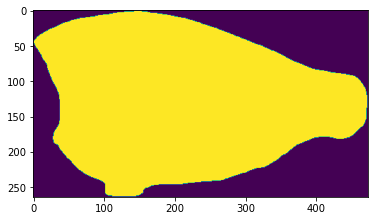

In [25]:
trunk_pro = img_seg.clean_trait_region(masks['trunk'])
trunk_mask = trunk_pro.image
pad_mask =np.pad(trunk_mask, ((1, 1), (1,1)), 'constant', constant_values=((0, 0),(0,0)))
list_contour = ski.measure.find_contours(trunk_mask)
erosion_trunk = ski.morphology.erosion(pad_mask)
plt.imshow(pad_mask)
np.all(pad_mask == erosion_trunk)
sum(sum(pad_mask))

In [30]:
print(pad_mask.shape)
print( trunk_mask.shape)
print(ski.measure.perimeter(trunk_mask))
print(ski.measure.perimeter(pad_mask))

(264, 474)
(262, 472)
1277.9453095790602
1277.9453095790602


In [43]:
contour_1 = ski.measure.find_contours(trunk_mask)
print(len(contour_1))
print(sum([a.shape[0] for a in contour_1]))

contour_2 = ski.measure.find_contours(pad_mask)[0]
print(contour_2.shape)

contour_ = np.logical_and(pad_mask, np.logical_not(erosion_trunk))
print(sum(sum(contour_)))
contour_3 = ski.measure.find_contours(contour_)[0]
print(sum([a.shape[0] for a in contour_]))

4
1427
(1495, 2)
1128
125136


[array([[262.5, 145. ],
        [262.5, 144. ],
        [262.5, 143. ],
        ...,
        [261.5, 146. ],
        [262. , 145.5],
        [262.5, 145. ]])]

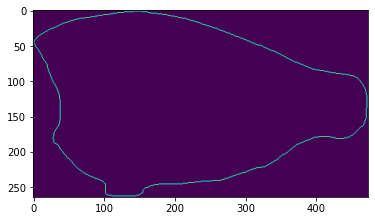

In [70]:
contour_ = np.logical_and(pad_mask, np.logical_not(erosion_trunk))
plt.imshow(contour_)
list_contour = ski.measure.find_contours(contour_)
list_contour_2 = ski.measure.find_contours(pad_mask)
list_contour_2


In [88]:
a =list_contour_2[0]
a.shape

(1495, 2)

In [93]:
distance = lambda a,b: ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
distance(list_contour_2[0][0,:],list_contour_2[0][1,:])
a =list_contour_2[0]
list_segment = [distance(a[i,:],a[i+1,:]) for i in range(a.shape[0]-1)]
sum(list_segment)

1280.7737367037953

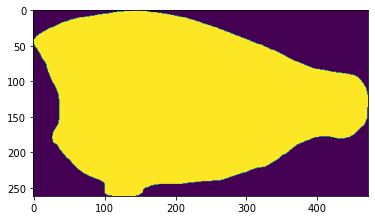

In [17]:
plt.imshow(trunk_pro.image)

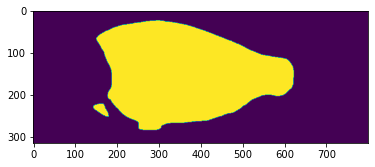

In [6]:
caudal_fin = img_seg.mask['trunk']

plt.imshow(caudal_fin)

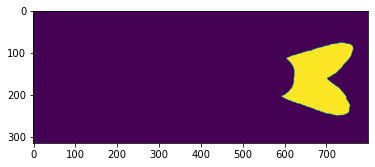

In [13]:
plt.imshow(img_seg.mask['caudal_fin'])

In [22]:
_,_,_,_,center_caudal,new_mask_caudal= img_seg.landmark_generic('caudal_fin')

row_caudal = round(center_caudal[0])
head_horil_line = new_mask_caudal[row_caudal, :]
#head_length = np.count_nonzero( cleaned_mask[:,col_eye]== 1)



In [52]:
def landmark_5_7(img_seg):
    '''
    locate the landmark 5 and 7 of the caudal fin. 
    We split the caudal fin upper and lower part (horizontal line through the middle).
    Then, in each case get the mot left point in the half of the caudal fin
    '''
    _,_,_,_,center_caudal,new_mask_caudal= img_seg.landmark_generic('caudal_fin')
    mask_caudal_5 = new_mask_caudal.copy()
    mask_caudal_7 = new_mask_caudal.copy()
    row_caudal = round(center_caudal[0])

    mask_caudal_5[row_caudal:,:] = 0
    mask_caudal_7[:row_caudal,:] = 0
        
    lm_5_7=[]
    for temp_mask in [mask_caudal_5,mask_caudal_7]:        
        x,y = np.where(temp_mask)
        y_front = y.min()
        x_front = round(np.mean(np.where(temp_mask[:, y_front,])))
        lm_5_7.append((int(x_front),int(y_front)))
    return lm_5_7[0], lm_5_7[1]

In [53]:
lm_5, lm_7 = landmark_5_7(img_seg)


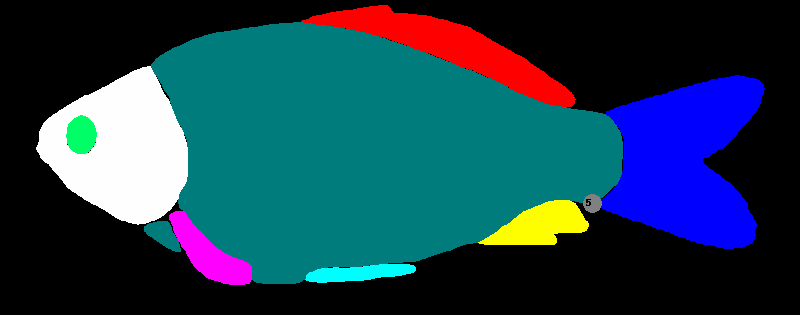

In [54]:
img_arr = img_seg.img_arr
def visualize_landmark(img_arr,coord):
        text = '5'    
        
        img = Image.fromarray(img_arr)
        img1 = ImageDraw.Draw(img)
        
        #
        #fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 15)
        fnt = ImageFont.load_default()

        x,y = coord
        xy = [(y-9,x-9),(y+9,x+9)]
        img1.ellipse(xy, fill='gray', outline=None, width=1)
                
        img1.text((y-6, x-6), text, font=fnt, fill='black')
            # Display the image created
            
        return img
    
visualize_landmark(img_arr,lm_7)

## Explore, visualize the masks 

(101, 2)

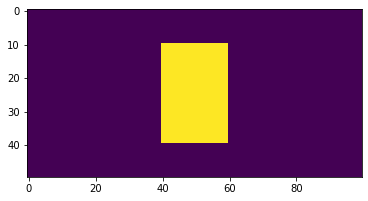

In [15]:
square_mat = np.zeros((50,100))

square_mat[10:40,40:60] = 1
plt.imshow(square_mat)


find_contour = ski.measure.find_contours(square_mat)
find_contour[0].shape

In [16]:
find_contour[0]

array([[39.5, 59. ],
       [39.5, 58. ],
       [39.5, 57. ],
       [39.5, 56. ],
       [39.5, 55. ],
       [39.5, 54. ],
       [39.5, 53. ],
       [39.5, 52. ],
       [39.5, 51. ],
       [39.5, 50. ],
       [39.5, 49. ],
       [39.5, 48. ],
       [39.5, 47. ],
       [39.5, 46. ],
       [39.5, 45. ],
       [39.5, 44. ],
       [39.5, 43. ],
       [39.5, 42. ],
       [39.5, 41. ],
       [39.5, 40. ],
       [39. , 39.5],
       [38. , 39.5],
       [37. , 39.5],
       [36. , 39.5],
       [35. , 39.5],
       [34. , 39.5],
       [33. , 39.5],
       [32. , 39.5],
       [31. , 39.5],
       [30. , 39.5],
       [29. , 39.5],
       [28. , 39.5],
       [27. , 39.5],
       [26. , 39.5],
       [25. , 39.5],
       [24. , 39.5],
       [23. , 39.5],
       [22. , 39.5],
       [21. , 39.5],
       [20. , 39.5],
       [19. , 39.5],
       [18. , 39.5],
       [17. , 39.5],
       [16. , 39.5],
       [15. , 39.5],
       [14. , 39.5],
       [13. , 39.5],
       [12. ,

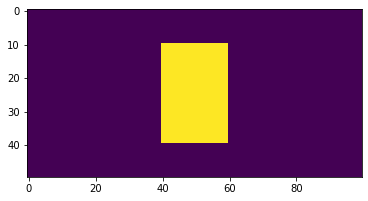

In [12]:
erosion_trunk = ski.morphology.erosion(pad_mask)
plt.imshow(pad_mask)
np.all(pad_mask == erosion_trunk)
sum(sum(pad_mask))